In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.layers import BatchNormalization

### Task 1: Load the Data

In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Task 2: Understand the data

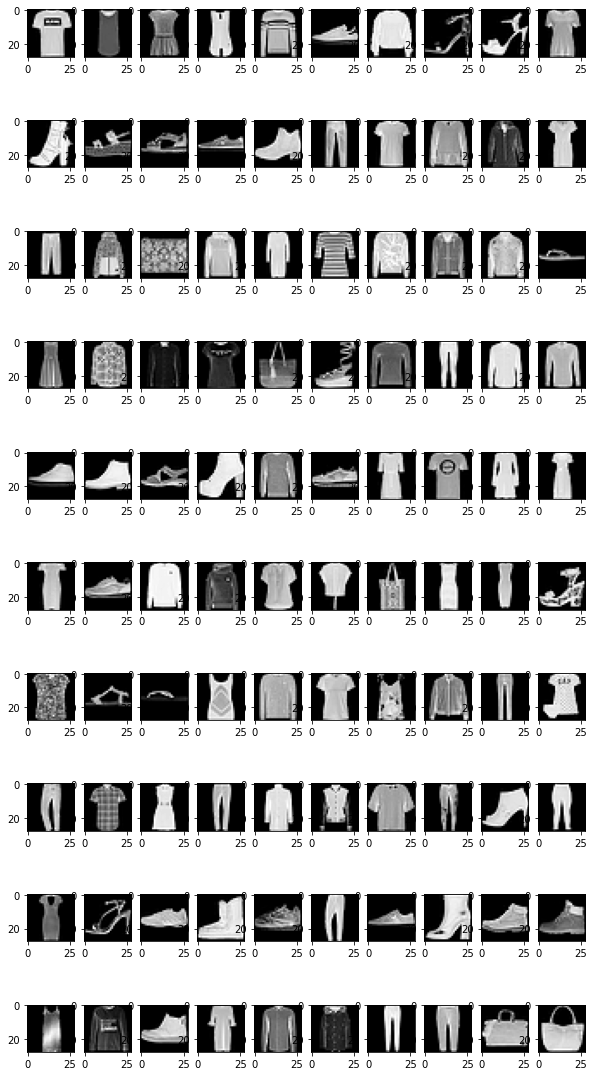

In [3]:
# Displaying 100 images from the train set

plt.figure(figsize=(10,20))

r = 10
c = 10

for i in range(1,101):
    plt.subplot(r,c,i)
    plt.imshow(x_train[i],cmap='gray')    

In [4]:
lab = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
lab_df = pd.DataFrame(np.unique(y_train),lab)
print('The unique labels in the dataset ->', np.unique(y_train))
print('\nLabels Name',lab_df.head(10))

print('\nNumber of training images ->', x_train.shape[0])
print('\nNumber of test images ->', x_test.shape[0])
print('\nSize of each image ->',x_train.shape)
print('\nNumeric range of input -> 0-255: Yes!, we need to rescale it')

x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float64')
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float64')
x_train = x_train/255
x_test = x_test/255

y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

print('\nShape of input tensor ->', x_train.shape)
print('\nShape of the target tensor ->', y_train.shape)

The unique labels in the dataset -> [0 1 2 3 4 5 6 7 8 9]

Labels Name             0
T-shirt     0
Trouser     1
Pullover    2
Dress       3
Coat        4
Sandal      5
Shirt       6
Sneaker     7
Bag         8
Ankle boot  9

Number of training images -> 60000

Number of test images -> 10000

Size of each image -> (60000, 28, 28)

Numeric range of input -> 0-255: Yes!, we need to rescale it

Shape of input tensor -> (60000, 28, 28, 1)

Shape of the target tensor -> (60000, 10)


### Task 3: Construct an input pipeline

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.1, random_state=42)

### Task 4.1: Construct a deep forward neural network

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary() 
keras.utils.plot_model(model)

print('Output Nodes -> 10')
print('Activation function -> Softmax')

print('\n hidden layers -> 1')
print('Number of nodes in each layers -> 32,64')
print('Activation function in each layer -> ReLU, ReLU')

print('\n Input Size -> (28,28,1)')

print('\n Loss Function -> Categorical Crossentropy')
print('\n Metrics for model evaluation -> Accurcay')
print('\n Optimizer -> Adam')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
____________________________________________

### Task 4.2: Fitting the model 

In [12]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=1,
                    validation_data = (x_val,y_val))

# Batch Size = 32

Epoch 1/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3777 - accuracy: 0.8646 - val_loss: 0.2861 - val_accuracy: 0.8972
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2347 - accuracy: 0.9135 - val_loss: 0.2215 - val_accuracy: 0.9193
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1804 - accuracy: 0.9329 - val_loss: 0.2131 - val_accuracy: 0.9215
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1399 - accuracy: 0.9488 - val_loss: 0.2134 - val_accuracy: 0.9217
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1032 - accuracy: 0.9617 - val_loss: 0.2333 - val_accuracy: 0.9225
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0755 - accuracy: 0.9717 - val_loss: 0.2512 - val_accuracy: 0.9262
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0579 - accuracy: 0.9790 - val_loss: 0.2733 - val_accuracy:

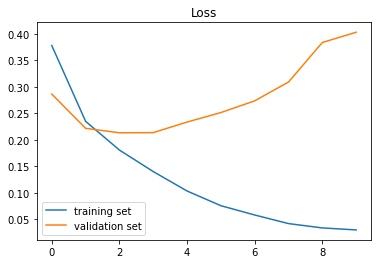

In [13]:
plt.plot(history.history['loss'], label = "training set")
plt.plot(history.history['val_loss'], label = "validation set")
plt.title('Loss')
plt.legend()
plt.show()

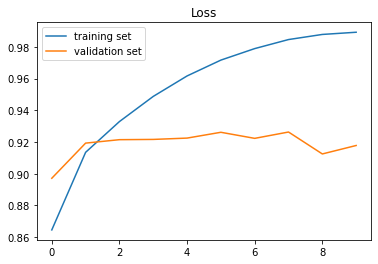

In [15]:
plt.plot(history.history['accuracy'], label = "training set")
plt.plot(history.history['val_accuracy'], label = "validation set")
plt.title('Accuracy')
plt.legend()
plt.show()

1. Yes, Over fitting can be seen, because while training the model the accuracy is very high but while validating the data, the accuracy is loss. ie. low generalization of the model caused by overfitting.

2. First epoch

### Task 4.3: Check the covergence through gradient

### ***** I Dont know to use Tensor board.. kindly look into it *****

In [8]:
%load_ext tensorboard
import tensorflow as tf
!rm -rf ./logs/ 
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [10]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=1,
                    verbose=1,
                    validation_data = (x_val,y_val),
                   callbacks = [tensorboard_callback])

1688/1688 [==============================] - 81s 48ms/step - loss: 0.3386 - accuracy: 0.8777 - val_loss: 0.2622 - val_accuracy: 0.9038


### Task 5: Fine Tuning the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

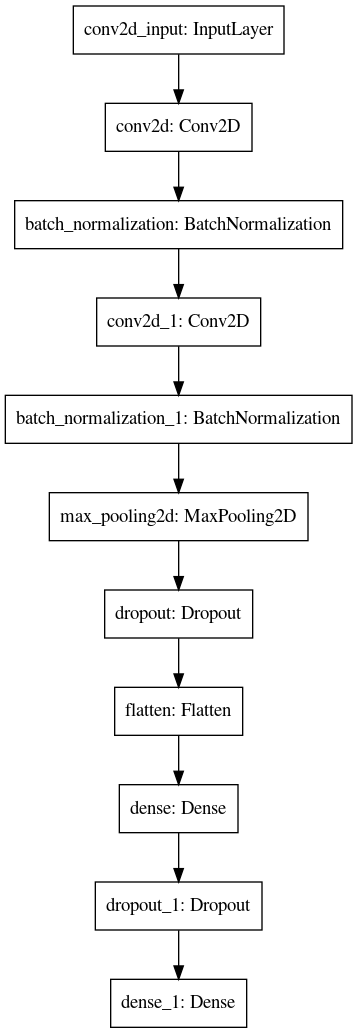

In [6]:
from tensorflow.keras import regularizers

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1), kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer= optimizers.Adam(learning_rate = 0.001), metrics=['accuracy'])

model.summary() 
keras.utils.plot_model(model)


# Batch normalization is added
# Dropout is added
# Layer-specifc weight reqularization is add
# learnin rate is added

In [7]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=1,
                    validation_data = (x_val,y_val))

Epoch 1/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.6513 - accuracy: 0.7814 - val_loss: 0.3968 - val_accuracy: 0.8635
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4566 - accuracy: 0.8441 - val_loss: 0.3437 - val_accuracy: 0.8838
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4049 - accuracy: 0.8639 - val_loss: 0.3356 - val_accuracy: 0.8868
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3581 - accuracy: 0.8777 - val_loss: 0.2802 - val_accuracy: 0.9008
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3339 - accuracy: 0.8871 - val_loss: 0.2669 - val_accuracy: 0.9100
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3088 - accuracy: 0.8951 - val_loss: 0.2597 - val_accuracy: 0.9135
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2907 - accuracy: 0.9010 - val_loss: 0.2631 - val_accuracy:

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2662407457828522
Test accuracy: 0.9197999835014343
